# Lightkurve Tutorials
## Retrieving Light Curves

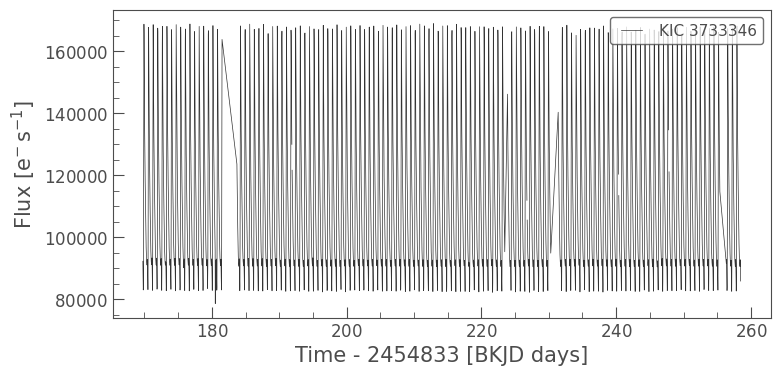

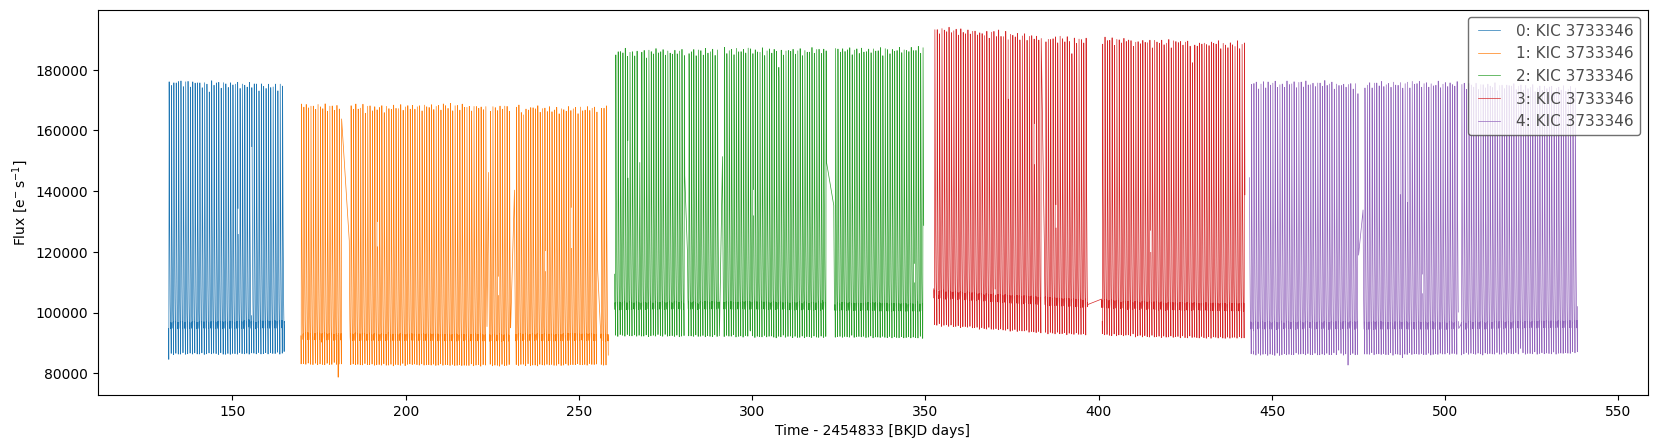

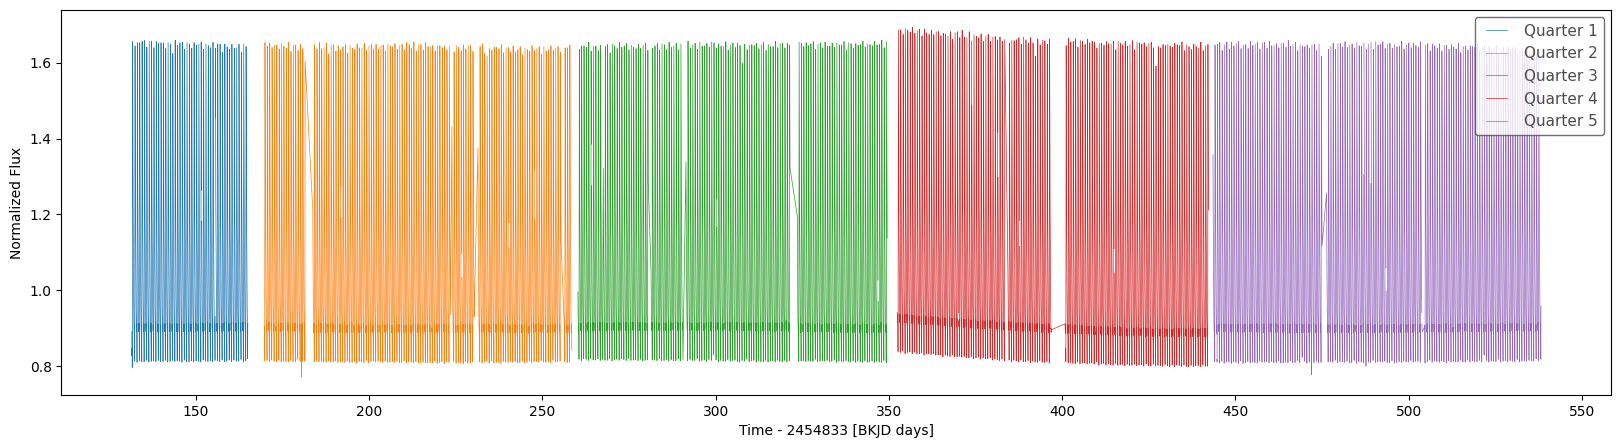

In [16]:
%matplotlib inline
import lightkurve as lk
import matplotlib.pyplot as plt
import numpy as np


result = lk.search_lightcurve('KIC 3733346', author='Kepler')
lc = result[1].download()
lc.plot()


lcs = result[:5].download_all()

fig, ax = plt.subplots(figsize=(20,5))
lcs.plot(ax=ax)

fig, ax = plt.subplots(figsize=(20,5))
for lc in lcs:
  lc.normalize().plot(ax=ax, label=f'Quarter {lc.quarter}')


## Periodogram objects

1.0350971683913832 d


<Axes: xlabel='Phase [JD]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

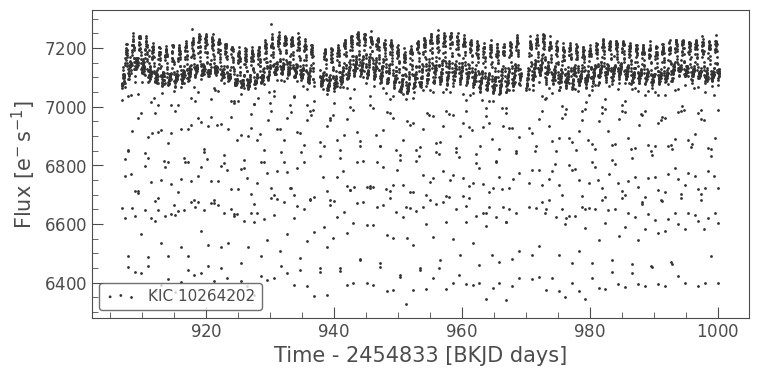

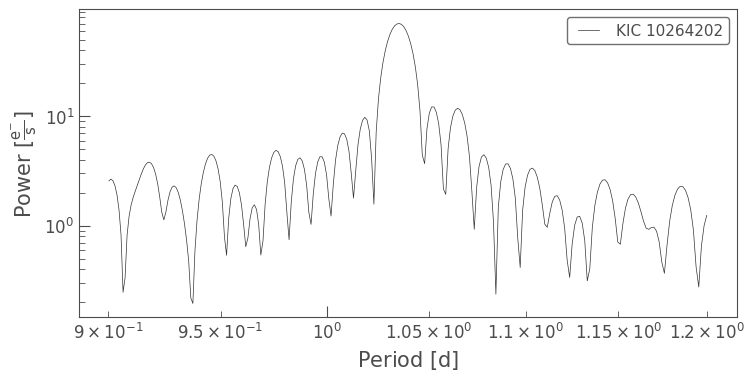

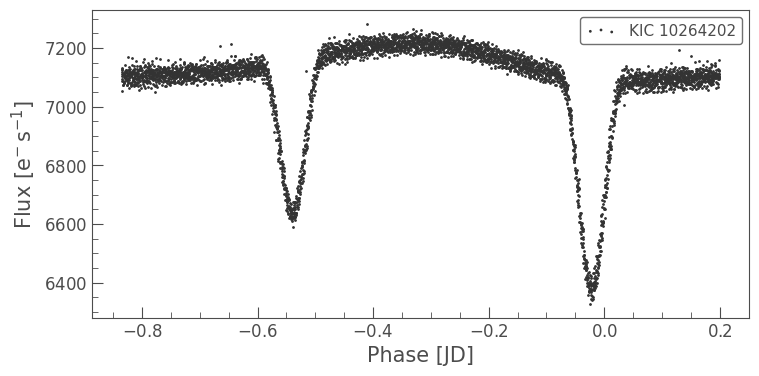

In [38]:
%matplotlib inline
import lightkurve as lk
import astropy.units as u

lc = lk.search_lightcurve('KIC 10264202', author='Kepler', quarter=10, cadence='long').download().remove_nans()
lc.scatter()

# sampeld at a rate tice that of highest frequency that appears
pg = lc.to_periodogram(minimum_period=0.9*u.day, maximum_period=1.2*u.day, oversample_factor=10)
pg.plot(scale='log', view='period')
pg.period
pg.power # measure of height of peak
print(pg.period_at_max_power)
lc.fold(period=pg.period_at_max_power, wrap_phase=0.2).scatter() # data is placed periodically as to fit into the given period

# Examples

For some reason, a harmonic of KIC 9388304 is the most prominent signal the program processes.

Period of KIC 1026146: 14.532161658991148 d
Compare to McQuillan 2014 period : 14.891 d
Percent difference: -2.41%
Period of KIC 1026474: 1.5653808713185227 d
Compare to McQuillan 2014 period : 1.569 d
Percent difference: -0.23%
Period of KIC 9388304: 0.1333524894965109 d
Compare to McQuillan 2014 period : 0.27 d
Percent difference: -50.61%
Period of KIC 9388304: 0.24021929381978138 d
Compare to McQuillan 2014 period : 0.244 d
Percent difference: -1.55%


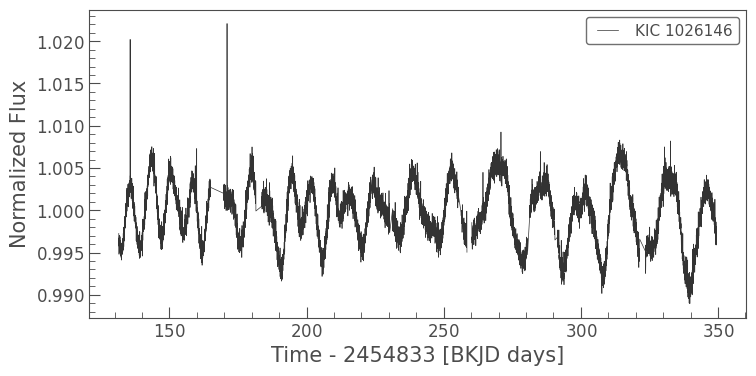

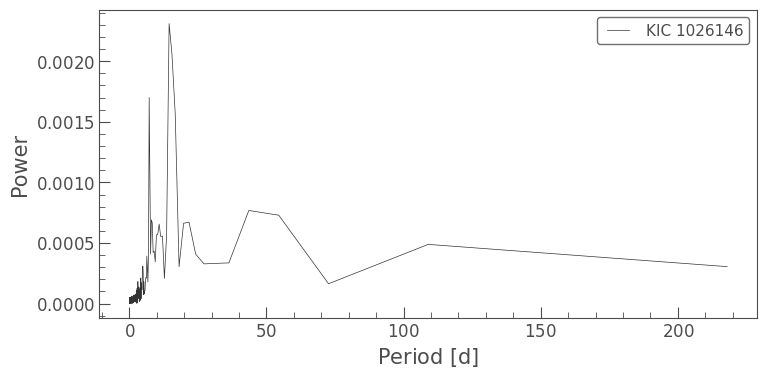

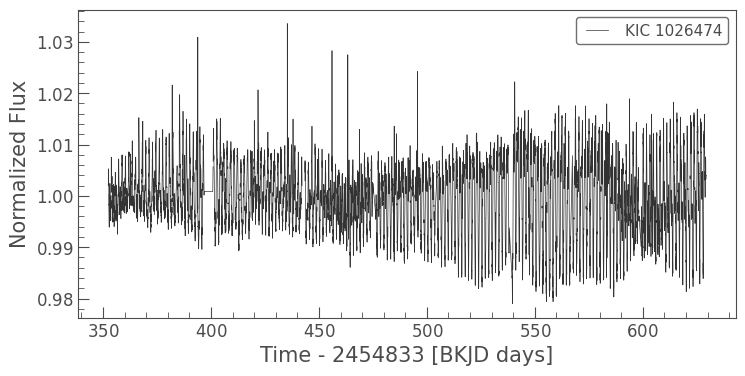

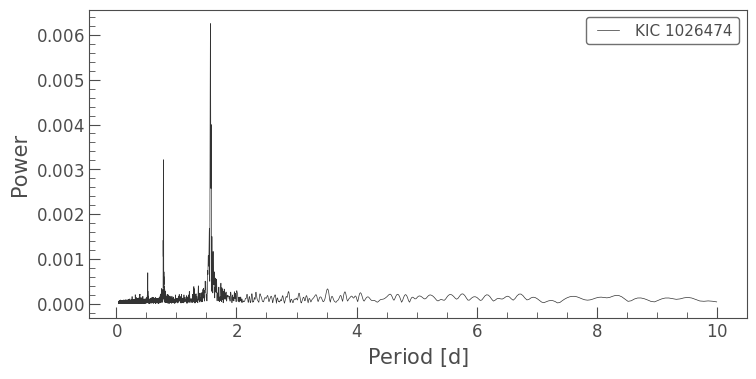

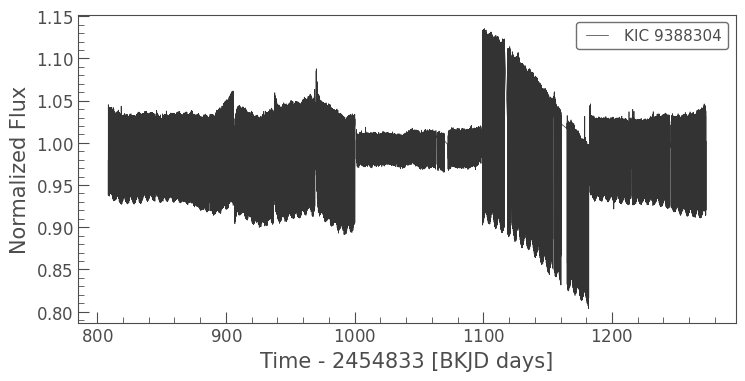

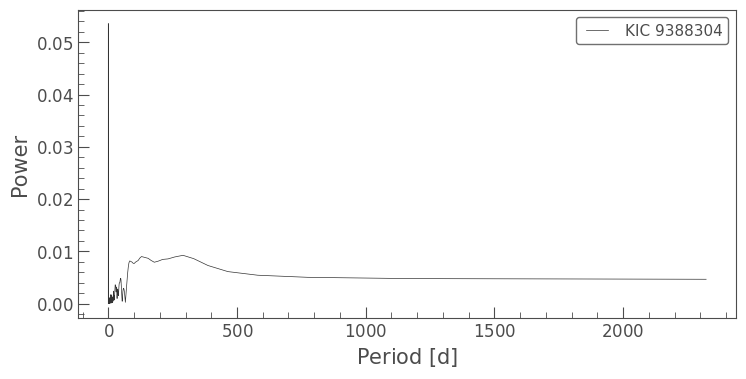

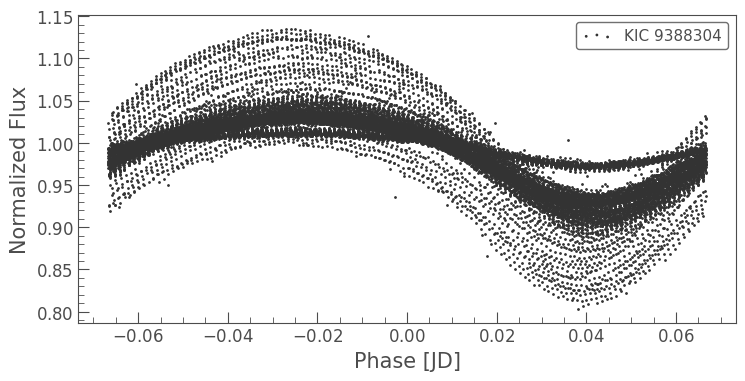

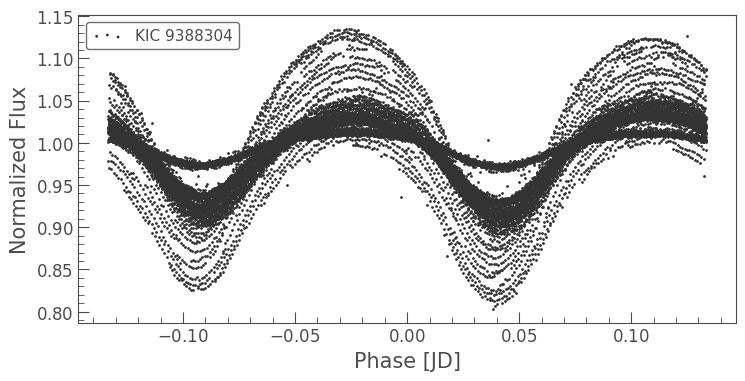

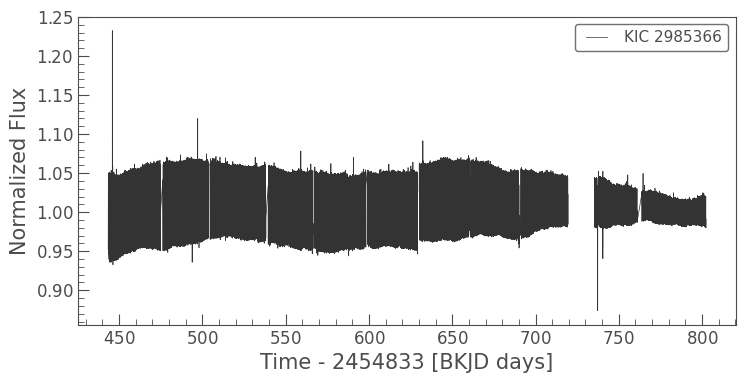

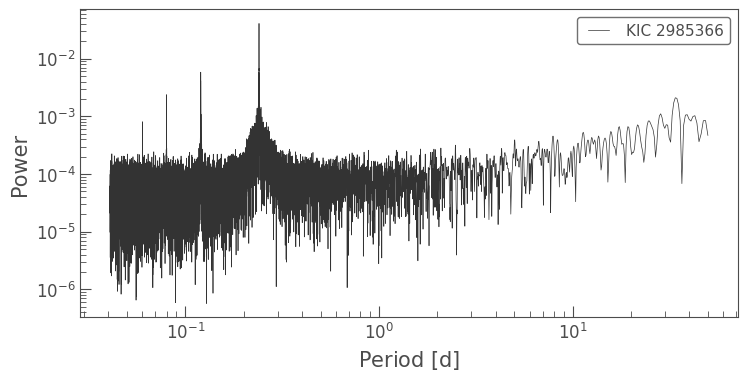

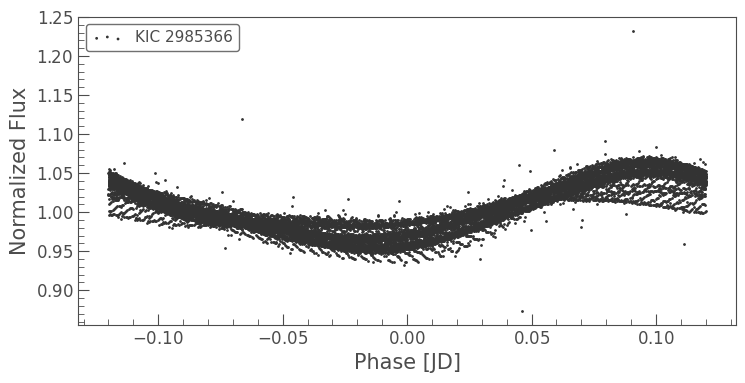

In [ ]:
%matplotlib inline
import lightkurve as lk
import matplotlib.pyplot as plt

'''
lc = lk.search_lightcurve('KIC 2157356', mission='Kepler', quarter=(1, 2, 3)).download_all().stitch()
lc.plot()
pg = lc.to_periodogram(maximum_period=100)
pg.plot(view='period')
pg.period_at_max_power
'''

# KIC 1026146
lc1 = lk.search_lightcurve('KIC 1026146', author='Kepler', quarter=(1, 2, 3), cadence='long').download_all().stitch()
lc1.plot()
pg1 = lc1.to_periodogram(oversample_factor=1)
pg1.plot(view='period')
print(f'Period of KIC 1026146: {pg1.period_at_max_power}')
print('Compare to McQuillan 2014 period : 14.891 d')
print(f'Percent difference: {(pg1.period_at_max_power.value/14.891 - 1) * 100:.2f}%')

# KIC 1026474
lc2 = lk.search_lightcurve('KIC 1026474', author='Kepler', quarter=(4, 5, 6), cadence='long').download_all().stitch()
lc2.plot()
pg2 = lc2.to_periodogram(maximum_period=10)
pg2.plot(view='period')
print(f'Period of KIC 1026474: {pg2.period_at_max_power}')
print('Compare to McQuillan 2014 period : 1.569 d')
print(f'Percent difference: {(pg2.period_at_max_power.value/1.569 - 1) * 100:.2f}%')

# KIC 9388304
lc3 = lk.search_lightcurve('KIC 9388304', author='Kepler', quarter=(9, 10, 11, 12, 13), cadence='long').download_all().stitch()
lc3.plot()
pg3 = lc3.to_periodogram()
pg3.plot(view='period')
lc3.fold(pg3.period_at_max_power).scatter()
lc3.fold(2*pg3.period_at_max_power).scatter()
print(f'Period of KIC 9388304: {pg3.period_at_max_power}')
print('Compare to McQuillan 2014 period : 0.27 d')
print(f'Percent difference: {(pg3.period_at_max_power.value/0.27 - 1) * 100:.2f}%')

# KIC 2985366
lc4 = lk.search_lightcurve('KIC 2985366', author='Kepler', quarter=(5, 6, 7, 8), cadence='long').download_all().stitch()
lc4.plot()
pg4 = lc4.to_periodogram(maximum_period=50)
pg4.plot(view='period', scale='log')
lc4.fold(pg4.period_at_max_power).scatter()
print(f'Period of KIC 9388304: {pg4.period_at_max_power}')
print('Compare to McQuillan 2014 period : 0.244 d')
print(f'Percent difference: {(pg4.period_at_max_power.value/0.244 - 1) * 100:.2f}%')
